## Project4: West Nile Virus Prediction

## Libraries Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier


## Data Importing

In [2]:
train = pd.read_csv('train.csv')
spray = pd.read_csv('spray.csv')
test = pd.read_csv('test.csv')
weather = pd.read_csv('weather.csv')


In [3]:
train.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [4]:
spray.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [5]:
test.head()

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

In [6]:
weather.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [7]:
weather = weather[weather.Station == 1].copy()


In [8]:
# setting the Date as index in both train and weather dataFrame and merging them together for the purpose of our analysis.

train['Date'] = pd.to_datetime(train['Date'])
train.set_index('Date',inplace=True)

weather['Date'] = pd.to_datetime(weather['Date'])
weather.set_index(weather['Date'], inplace=True)

# merging train and weather data.
train = train.join(weather, how='left')

train.head()

Address  \
Date                                                            
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                           Species  Block           Street  Trap  \
Date                                                               
2007-05-29  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     62    N MANDELL AVE  T007   
2007-05-29  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
2007-05-29          CULEX RESTUANS     79     W FOSTER AVE  T015   

                       AddressNumberAndStreet   Latitude  Longitude  \
Date                                                                  
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279   
2007-05-29    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
2007-05-29    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   

            AddressAccuracy  NumMosquitos  ...  CodeSum  Depth Water1  \
Date                                       ...                          
2007-05-29                9             1  ...    BR HZ      0      M   
2007-05-29                9             1  ...    BR HZ      0      M   
2007-05-29                9             1  ...    BR HZ      0      M   
2007-05-29                8             1  ...    BR HZ      0      M   
2007-05-29                8             4  ...    BR HZ      0      M   

            SnowFall  PrecipTotal StnPressure SeaLevel  ResultSpeed ResultDir  \
Date                                                                            
2007-05-29       0.0         0.00       29.39    30.11          5.8        18   
2007-05-29       0.0         0.00       29.39    30.11          5.8        18   
2007-05-29       0.0         0.00       29.39    30.11          5.8        18   
2007-05-29       0.0         0.00       29.39    30.11          5.8        18   
2007-05-29       0.0         0.00       29.39    30.11          5.8        18   

           AvgSpeed  
Date                 
2007-05-29      6.5  
2007-05-29      6.5  
2007-05-29      6.5  
2007-05-29      6.5  
2007-05-29      6.5  

[5 rows x 33 columns]

In [9]:
for col in train:
    print(col)
    print(train[col].unique())
    print('\n')

Address
['4100 North Oak Park Avenue, Chicago, IL 60634, USA'
 '6200 North Mandell Avenue, Chicago, IL 60646, USA'
 '7900 West Foster Avenue, Chicago, IL 60656, USA'
 '1500 West Webster Avenue, Chicago, IL 60614, USA'
 '2500 West Grand Avenue, Chicago, IL 60654, USA'
 '1100 Roosevelt Road, Chicago, IL 60608, USA'
 '1100 West Chicago Avenue, Chicago, IL 60642, USA'
 '2100 North Stave Street, Chicago, IL 60647, USA'
 '2200 North Cannon Drive, Chicago, IL 60614, USA'
 '2200 West 113th Street, Chicago, IL 60643, USA'
 '1100 South Peoria Street, Chicago, IL 60608, USA'
 '1700 West 95th Street, Chicago, IL 60643, USA'
 '2200 West 89th Street, Chicago, IL 60643, USA'
 'North Streeter Drive, Chicago, IL 60611, USA'
 '6500 North Oak Park Avenue, Chicago, IL 60631, USA'
 '7500 North Oakley Avenue, Chicago, IL 60645, USA'
 '1500 North Long Avenue, Chicago, IL 60651, USA'
 '8900 South Carpenter Street, Chicago, IL 60620, USA'
 '9100 West Higgins Avenue, Chicago, IL 60656, USA'
 '3600 North Pittsbu

In [10]:
train.replace('M',np.NaN,inplace=True)
train.replace('-', np.NaN, inplace=True)
train.replace('  T', 1, inplace=True)

In [11]:
weather_list = train.CodeSum.apply(lambda x: x.strip().split(' ')) 


train['is_rain'] = weather_list.apply(lambda x: 'RA' in x).astype(int)
train['is_mist'] = weather_list.apply(lambda x: 'BR' in x).astype(int)
train['is_haze'] = weather_list.apply(lambda x: 'HZ' in x).astype(int)

In [12]:
train['lat_int'] = train.Latitude.astype(int)
train['long_int'] = train.Longitude.astype(int)

In [13]:
def extract_second_position(value):
    return value[1]

train['sunrise_num'] = train['Sunrise'].apply(extract_second_position)

In [14]:
def extract_second_position(value):
    return value[1]

train['sunset_num'] = train['Sunset'].apply(extract_second_position)

In [15]:
train.columns = train.columns.str.lower()

In [16]:
train['year'] = pd.DatetimeIndex(train['date']).year
train['month'] = pd.DatetimeIndex(train['date']).month
train['day_of_Week'] = pd.DatetimeIndex(train['date']).dayofweek
train['week_number'] = train['date'].dt.isocalendar().week

train.rename(columns={'wnvpresent': 'virus_present', 'nummosquitos': 'number_mosquitos'}, inplace=True)


In [17]:
train.head()

address  \
Date                                                            
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                           species  block           street  trap  \
Date                                                               
2007-05-29  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     62    N MANDELL AVE  T007   
2007-05-29  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
2007-05-29          CULEX RESTUANS     79     W FOSTER AVE  T015   

                       addressnumberandstreet   latitude  longitude  \
Date                                                                  
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279   
2007-05-29    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
2007-05-29    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   

            addressaccuracy  number_mosquitos  ...  is_mist  is_haze lat_int  \
Date                                           ...                             
2007-05-29                9                 1  ...        1        1      41   
2007-05-29                9                 1  ...        1        1      41   
2007-05-29                9                 1  ...        1        1      41   
2007-05-29                8                 1  ...        1        1      41   
2007-05-29                8                 4  ...        1        1      41   

            long_int  sunrise_num sunset_num  year  month day_of_Week  \
Date                                                                    
2007-05-29       -87            4          9  2007      5           1   
2007-05-29       -87            4          9  2007      5           1   
2007-05-29       -87            4          9  2007      5           1   
2007-05-29       -87            4          9  2007      5           1   
2007-05-29       -87            4          9  2007      5           1   

           week_number  
Date                    
2007-05-29          22  
2007-05-29          22  
2007-05-29          22  
2007-05-29          22  
2007-05-29          22  

[5 rows x 44 columns]

In [18]:
train.shape

(10506, 44)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10506 entries, 2007-05-29 to 2013-09-26
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   address                 10506 non-null  object        
 1   species                 10506 non-null  object        
 2   block                   10506 non-null  int64         
 3   street                  10506 non-null  object        
 4   trap                    10506 non-null  object        
 5   addressnumberandstreet  10506 non-null  object        
 6   latitude                10506 non-null  float64       
 7   longitude               10506 non-null  float64       
 8   addressaccuracy         10506 non-null  int64         
 9   number_mosquitos        10506 non-null  int64         
 10  virus_present           10506 non-null  int64         
 11  station                 10506 non-null  int64         
 12  date                    10506

In [20]:
train.describe(include='all').T

count unique  \
address                   10506    138   
species                   10506      7   
block                   10506.0    NaN   
street                    10506    128   
trap                      10506    136   
addressnumberandstreet    10506    138   
latitude                10506.0    NaN   
longitude               10506.0    NaN   
addressaccuracy         10506.0    NaN   
number_mosquitos        10506.0    NaN   
virus_present           10506.0    NaN   
station                 10506.0    NaN   
date                      10506    NaN   
tmax                    10506.0    NaN   
tmin                    10506.0    NaN   
tavg                      10506     31   
depart                    10506     28   
dewpoint                10506.0    NaN   
wetbulb                   10413     30   
heat                      10506     14   
cool                      10506     18   
sunrise                   10506     62   
sunset                    10506     58   
codesum                   10506     19   
depth                     10506      1   
water1                      0.0    NaN   
snowfall                  10506      2   
preciptotal               10506     31   
stnpressure               10413     37   
sealevel                  10506     41   
resultspeed             10506.0    NaN   
resultdir               10506.0    NaN   
avgspeed                  10506     61   
is_rain                 10506.0    NaN   
is_mist                 10506.0    NaN   
is_haze                 10506.0    NaN   
lat_int                 10506.0    NaN   
long_int                10506.0    NaN   
sunrise_num               10506      2   
sunset_num                10506      3   
year                    10506.0    NaN   
month                   10506.0    NaN   
day_of_Week             10506.0    NaN   
week_number             10506.0   <NA>   

                                                                      top  \
address                 ORD Terminal 5, O'Hare International Airport, ...   
species                                            CULEX PIPIENS/RESTUANS   
block                                                                 NaN   
street                                                    W OHARE AIRPORT   
trap                                                                 T900   
addressnumberandstreet                 1000  W OHARE AIRPORT, Chicago, IL   
latitude                                                              NaN   
longitude                                                             NaN   
addressaccuracy                                                       NaN   
number_mosquitos                                                      NaN   
virus_present                                                         NaN   
station                                                               NaN   
date                                                                  NaN   
tmax                                                                  NaN   
tmin                                                                  NaN   
tavg                                                                   71   
depart                                                                  7   
dewpoint                                                              NaN   
wetbulb                                                                69   
heat                                                                    0   
cool                                                                    0   
sunrise                                                              0445   
sunset                                                               1911   
codesum                                                                     
depth                                                                   0   
water1                                                                NaN   
snowfall                                                

In [21]:
train.isnull().sum()

address                       0
species                       0
block                         0
street                        0
trap                          0
addressnumberandstreet        0
latitude                      0
longitude                     0
addressaccuracy               0
number_mosquitos              0
virus_present                 0
station                       0
date                          0
tmax                          0
tmin                          0
tavg                          0
depart                        0
dewpoint                      0
wetbulb                      93
heat                          0
cool                          0
sunrise                       0
sunset                        0
codesum                       0
depth                         0
water1                    10506
snowfall                      0
preciptotal                   0
stnpressure                  93
sealevel                      0
resultspeed                   0
resultdi

In [22]:
columns_to_convert = ['sunrise_num', 'sunset_num', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']  # Specify columns to convert

train[columns_to_convert] = train[columns_to_convert].astype(float)

In [23]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


## Exploratory Data Analysis

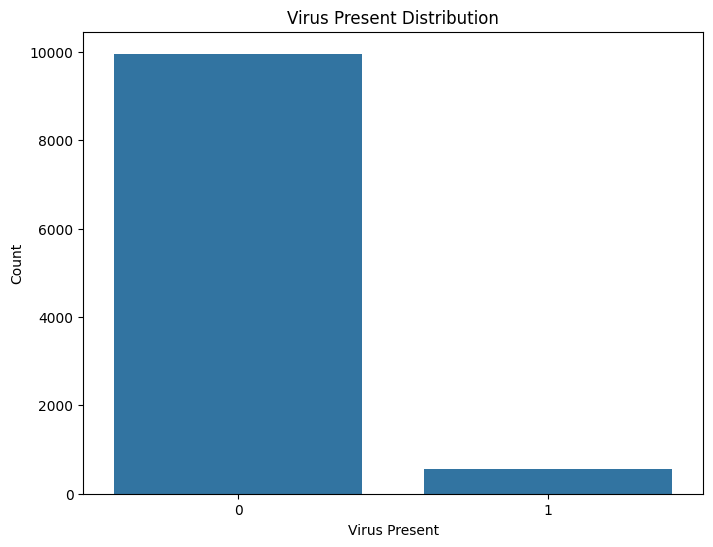

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='virus_present')
plt.title('Virus Present Distribution')
plt.xlabel('Virus Present')
plt.ylabel('Count')
plt.show()

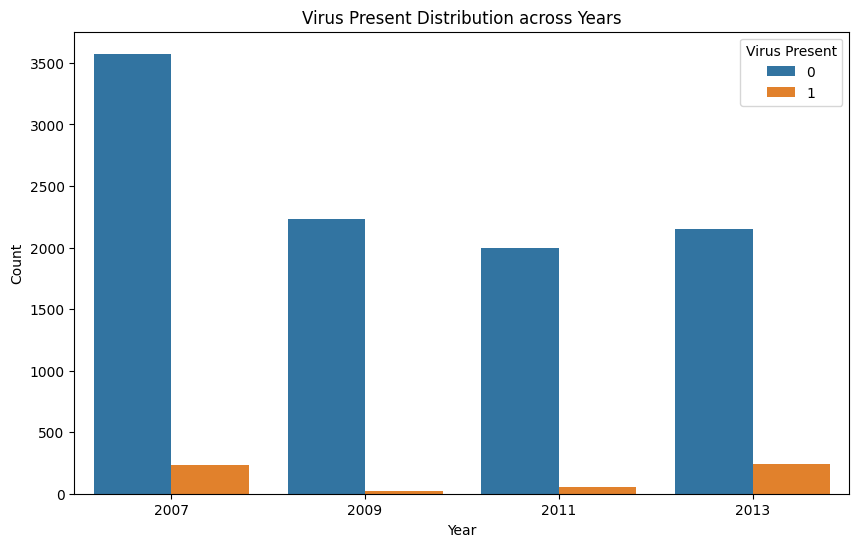

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='year', hue='virus_present')
plt.title('Virus Present Distribution across Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Virus Present', loc='upper right')
plt.show()

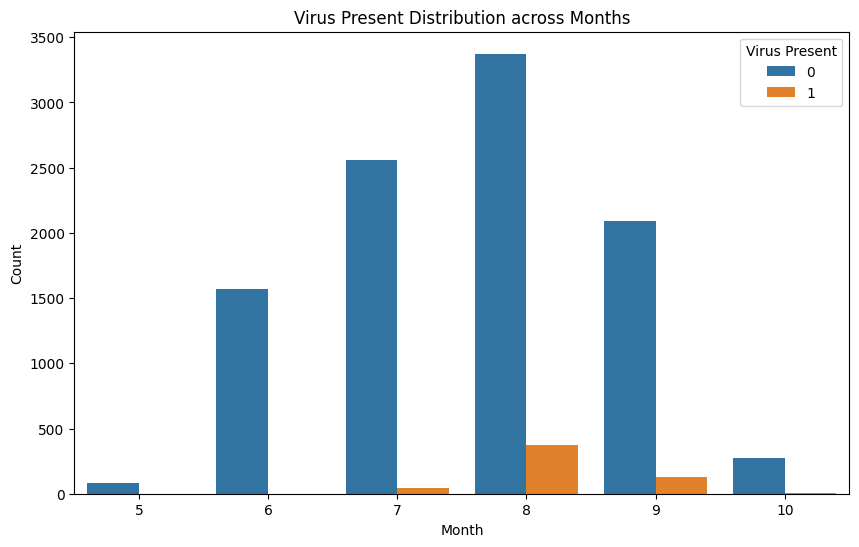

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='month', hue='virus_present')
plt.title('Virus Present Distribution across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Virus Present', loc='upper right')
plt.show()

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_28154/1162946362.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_mosquitos.index, y=mean_mosquitos, errorbar=None, palette=colors)
/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_28154/1162946362.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


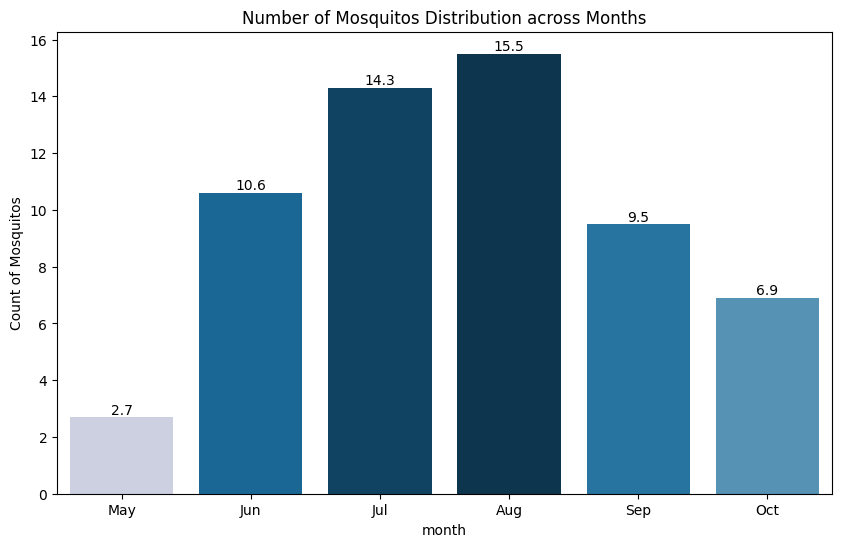

In [27]:
# Bar plot of total rainfall by month
mean_mosquitos = train.groupby("month")["number_mosquitos"].mean().round(1)
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=0, vcenter=5, vmax=mean_mosquitos.max())
colors = [plt.cm.PuBu(norm(c)) for c in mean_mosquitos]



plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mean_mosquitos.index, y=mean_mosquitos, errorbar=None, palette=colors)
ax.set(xticklabels=['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Number of Mosquitos Distribution across Months')
plt.ylabel('Count of Mosquitos')

# Adding labels to the bars
for i, val in enumerate(mean_mosquitos):
    ax.text(i, val, f'{val}', ha='center', va='bottom')

plt.show()

In [28]:

plt.figure(figsize=(20, 10))

# Customize line plot aesthetics
sns.lineplot(x='number_mosquitos', y='virus_present', data=train, 
             marker='o',  # Set marker style
             markersize=8,  # Set marker size
             color='blue',  # Set line color
             linestyle='-',  # Set line style
             linewidth=1)  # Set line width

# Set title and labels
plt.title('Mosquito Numbers vs. Virus Presence')
plt.xlabel('Number of Mosquitos')
plt.ylabel('Virus Present');

In [29]:
plt.figure(figsize=(20, 6))
sns.barplot(data=train, x='block', y='number_mosquitos', errorbar=None)
plt.title('Count of Mosquitos Distribution across Blocks')
plt.xlabel('Block')
plt.ylabel('Count of Mosquitos')
plt.show()

In [30]:
# Group by year, block, and street to calculate virus present count and total count
grouped = train.groupby(['block', 'street'])['virus_present'].agg(['sum', 'count'])
grouped.columns = ['virus_count', 'total_count']

# Calculate the percentage of virus present for each street within each block
grouped['% virus_present'] = np.round((grouped['virus_count'] / grouped['total_count']) * 100, 2)

# Display streets with a percentage greater than 0
result = grouped[grouped['% virus_present'] > 0].reset_index()
result = result.set_index(['block', 'street']).sort_values(by=['% virus_present'], ascending=False)
pd.DataFrame(result).head(20)

virus_count  total_count  % virus_present
block street                                                       
65     N OAK PARK AVE               6           31            19.35
60     N AVONDALE AVE               4           24            16.67
       W ROSCOE ST                  2           14            14.29
71     N HARLEM AVE                 7           50            14.00
64     W STRONG ST                  4           30            13.33
22     W 89TH ST                    6           50            12.00
46     N MILWAUKEE AVE             14          122            11.48
79     W FOSTER AVE                 4           35            11.43
42     W 65TH ST                    7           62            11.29
21     N CANNON DR                  1            9            11.11
13     N LARAMIE AVE                7           65            10.77
82     S KOSTNER AVE               11          103            10.68
72     N OKETO AVE                  7           66            10.61
51     N MONT CLARE AVE             9           87            10.34
52     S NORDICA                    2           20            10.00
41     N OAK PARK AVE              18          185             9.73
91     W HIGGINS AVE                3           31             9.68
39     N SPRINGFIELD AVE            6           62             9.68
61     W FULLERTON AVE             10          104             9.62
21     N LAWLER AVE                 2           21             9.52

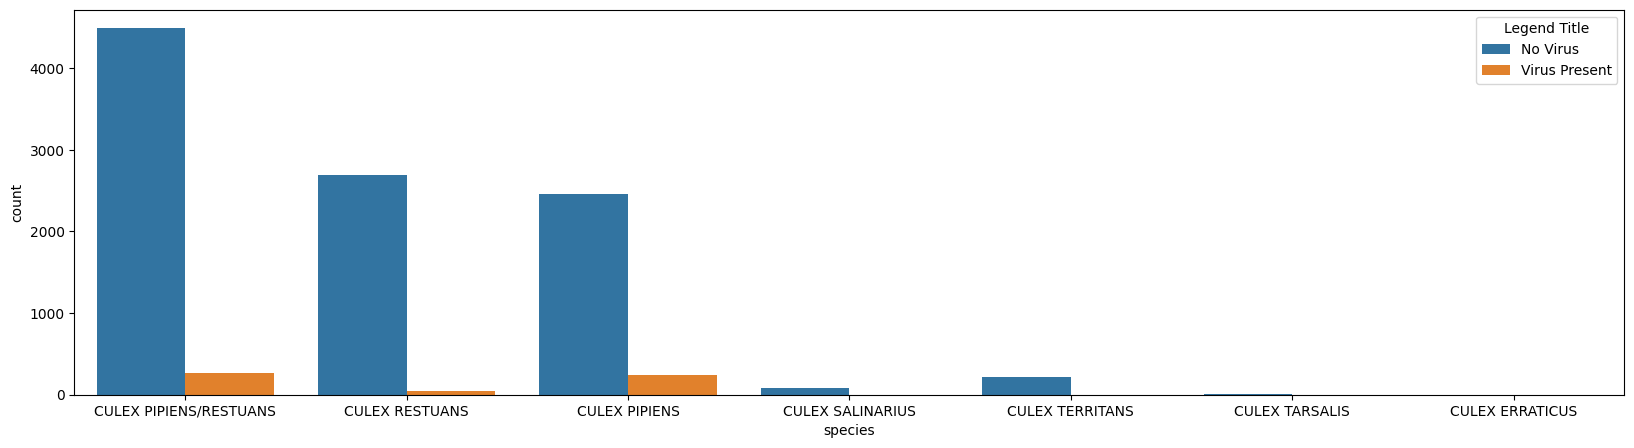

In [31]:
plt.figure(figsize=(20, 5))
sns.countplot(x='species', hue='virus_present', data=train)
legend_labels = ['No Virus', 'Virus Present']
plt.legend(title='Legend Title', labels=legend_labels);

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_28154/2873432850.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['tmin'])
/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_28154/2873432850.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['tmax'])
/var/fold

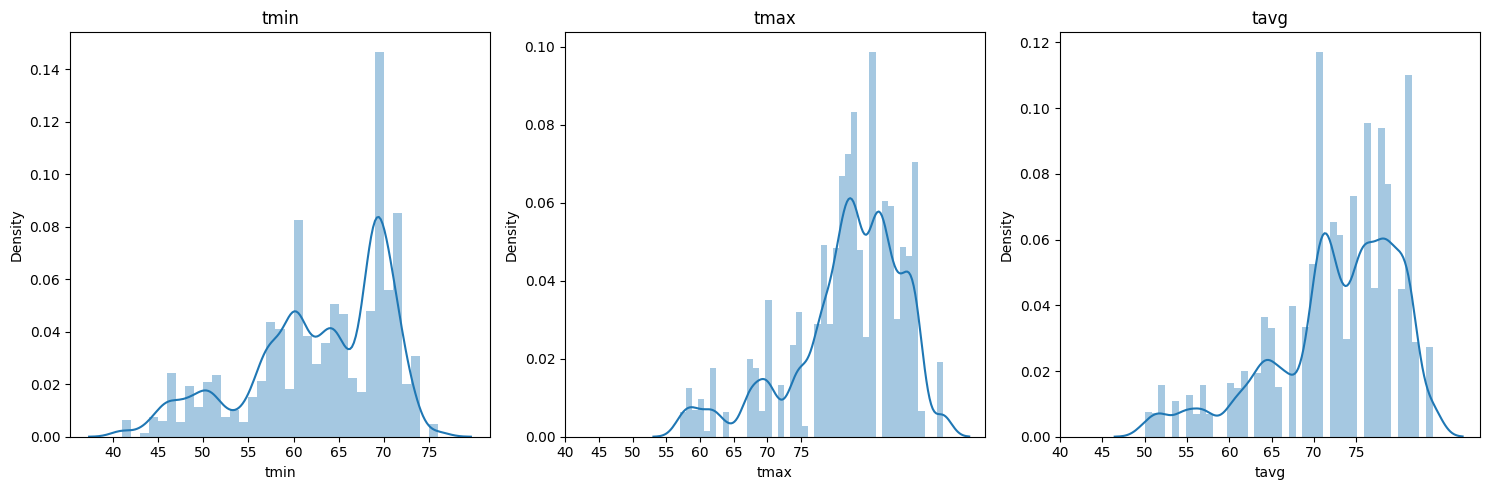

In [32]:
plt.figure(figsize=(15, 5))

# Subplot 1: tmin
plt.subplot(1, 3, 1)
sns.distplot(train['tmin'])
plt.xticks(np.arange(40, 80, 5))  # Set x-axis ticks
plt.title('tmin')

# Subplot 2: tmax
plt.subplot(1, 3, 2)
sns.distplot(train['tmax'])
plt.xticks(np.arange(40, 80, 5))  # Set x-axis ticks
plt.title('tmax')

# Subplot 3: tavg
plt.subplot(1, 3, 3)
sns.distplot(train['tavg'])
plt.xticks(np.arange(40, 80, 5))  # Set x-axis ticks
plt.title('tavg')

plt.tight_layout()  # Adjusts subplots to avoid overlapping
plt.show()

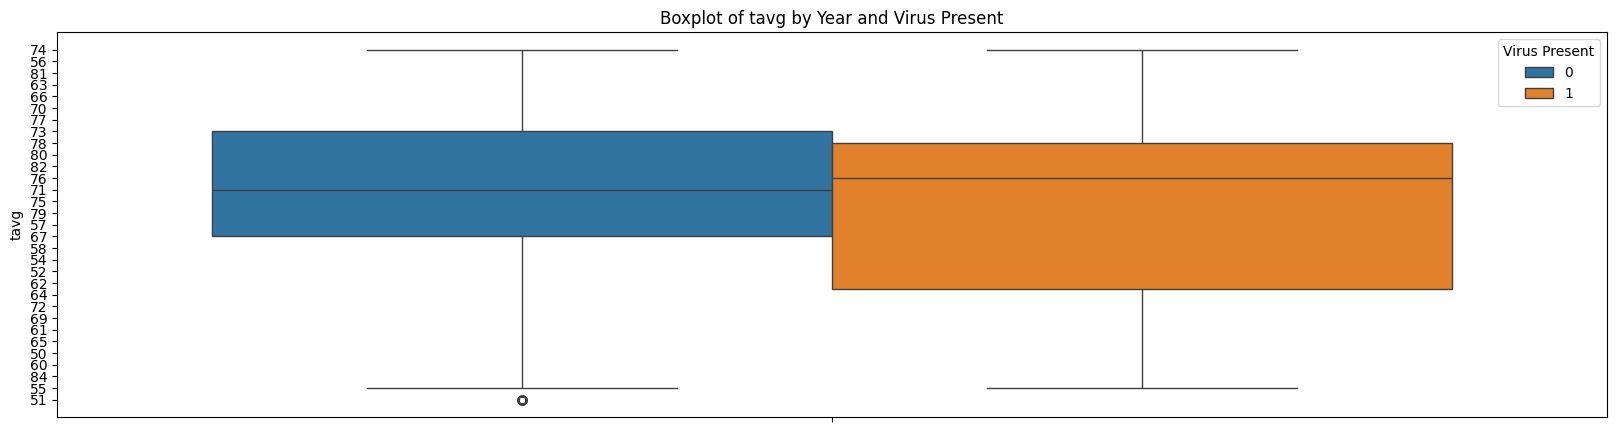

In [33]:
# Create a boxplot
plt.figure(figsize=(20, 5))
sns.boxplot(y='tavg', hue='virus_present', data=train)

# Set plot title and labels
plt.title('Boxplot of tavg by Year and Virus Present')
plt.ylabel('tavg')
plt.legend(title='Virus Present')

# Show the plot
plt.show()

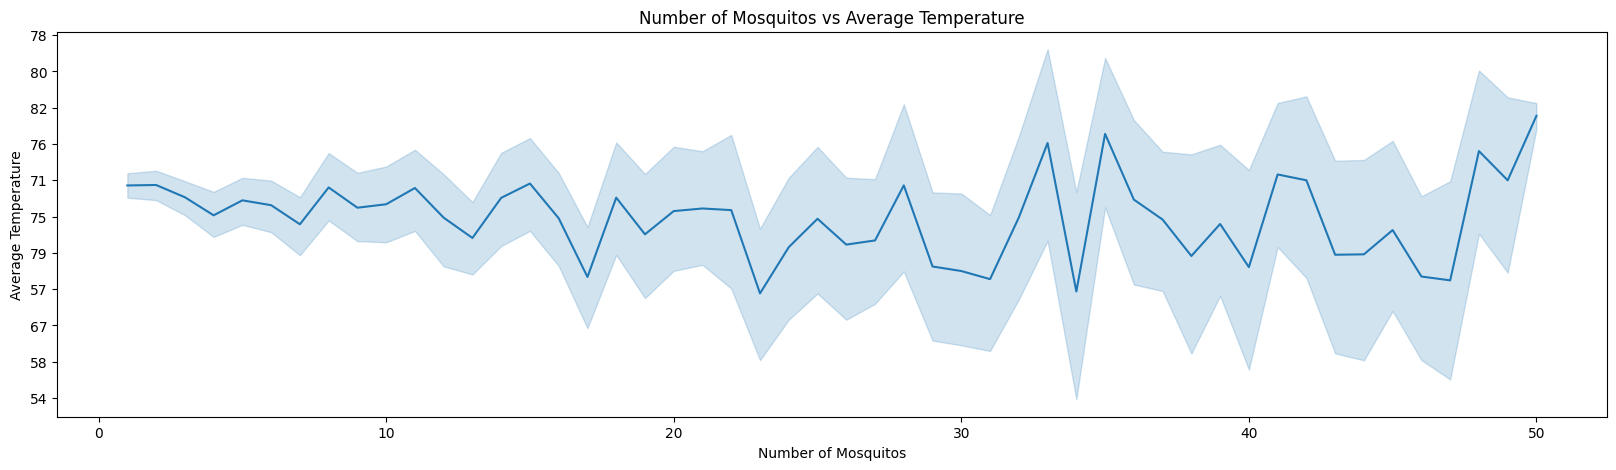

In [34]:
# Create a scatter plot
plt.figure(figsize=(20, 5))
sns.lineplot(x='number_mosquitos', y='tavg', data=train)

# Set plot title and labels
plt.title('Number of Mosquitos vs Average Temperature')
plt.xlabel('Number of Mosquitos')
plt.ylabel('Average Temperature')

# Show the plot
plt.show()

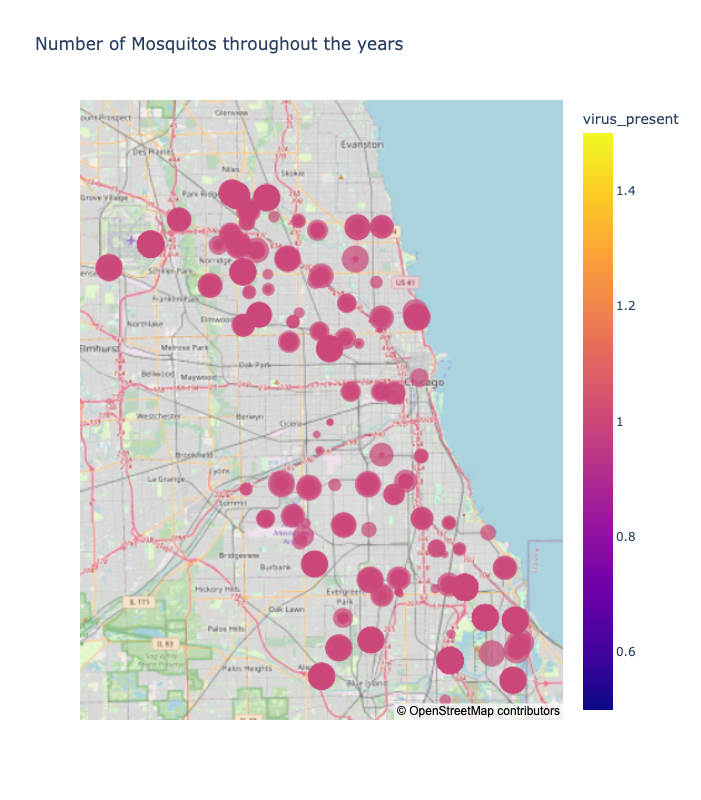

In [35]:
fig = px.scatter_mapbox(
    data_frame=train[(train.virus_present == 1)],
    title="Number of Mosquitos throughout the years",
    lat="latitude", lon="longitude",
    size="number_mosquitos",
    color='virus_present',
    zoom=9.5,
    height=800, width=800,
    mapbox_style='open-street-map')
fig.show()

In [36]:
fig = px.scatter_mapbox(
    data_frame=spray,
    lat="Latitude", lon="Longitude",
    zoom=10,
    color='Date',
    height=800, width=800,
    mapbox_style='open-street-map')
fig.show()

In [37]:
spray.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [38]:
spray.tail()

Date        Time   Latitude  Longitude
14830  2013-09-05  8:34:11 PM  42.006587 -87.812355
14831  2013-09-05  8:35:01 PM  42.006192 -87.816015
14832  2013-09-05  8:35:21 PM  42.006022 -87.817392
14833  2013-09-05  8:35:31 PM  42.005453 -87.817423
14834  2013-09-05  8:35:41 PM  42.004805 -87.817460

In [39]:
train.isnull().sum()

address                       0
species                       0
block                         0
street                        0
trap                          0
addressnumberandstreet        0
latitude                      0
longitude                     0
addressaccuracy               0
number_mosquitos              0
virus_present                 0
station                       0
date                          0
tmax                          0
tmin                          0
tavg                          0
depart                        0
dewpoint                      0
wetbulb                      93
heat                          0
cool                          0
sunrise                       0
sunset                        0
codesum                       0
depth                         0
water1                    10506
snowfall                      0
preciptotal                   0
stnpressure                  93
sealevel                      0
resultspeed                   0
resultdi

<Axes: >

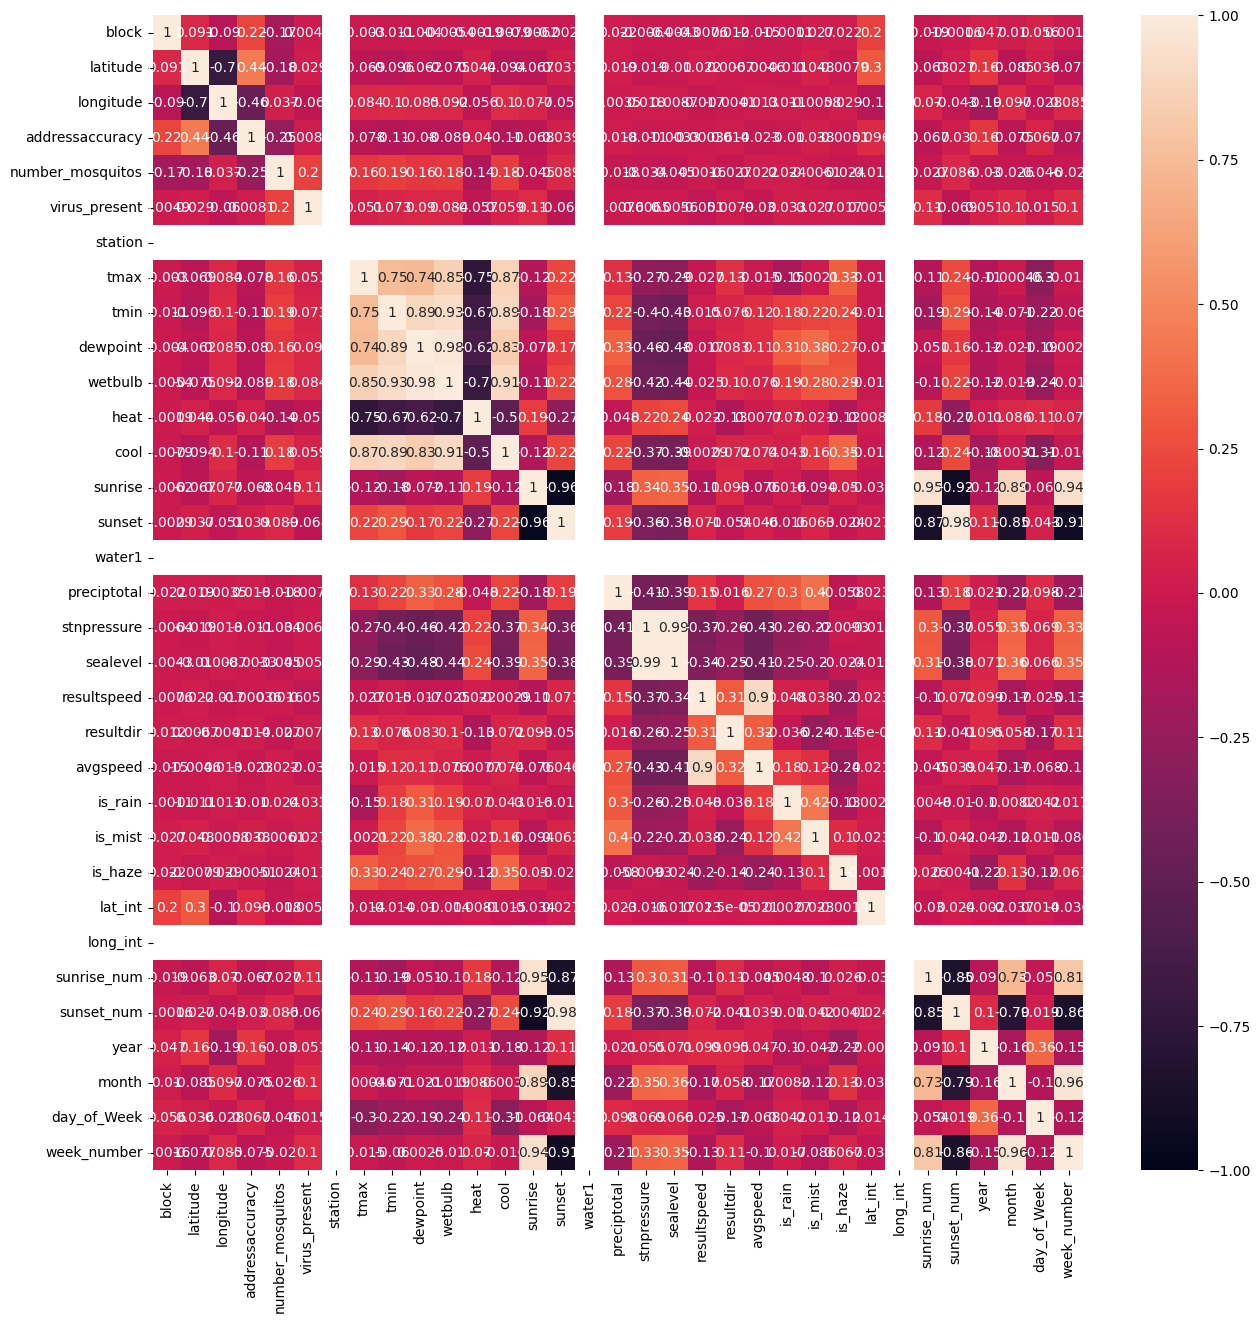

In [40]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(numeric_only=True), vmax=1, vmin=-1, annot=True)


In [41]:
train.corr(numeric_only=True)['virus_present'].sort_values(ascending=False)

virus_present       1.000000
number_mosquitos    0.196820
sunrise_num         0.110303
sunrise             0.105227
week_number         0.104171
month               0.100143
dewpoint            0.090460
wetbulb             0.083731
tmin                0.072719
cool                0.058953
year                0.050865
tmax                0.050536
is_rain             0.032734
latitude            0.028697
is_mist             0.027292
is_haze             0.016541
day_of_Week         0.014968
addressaccuracy     0.008064
resultdir           0.007922
stnpressure         0.006467
lat_int             0.005628
sealevel            0.005620
block               0.004877
preciptotal        -0.007593
avgspeed           -0.029958
resultspeed        -0.051177
heat               -0.056813
longitude          -0.060345
sunset             -0.068451
sunset_num         -0.068504
station                  NaN
water1                   NaN
long_int                 NaN
Name: virus_present, dtype: float64

In [42]:
train.columns

Index(['address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'number_mosquitos', 'virus_present', 'station', 'date', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'codesum', 'depth', 'water1', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'is_rain', 'is_mist', 'is_haze', 'lat_int', 'long_int', 'sunrise_num',
       'sunset_num', 'year', 'month', 'day_of_Week', 'week_number'],
      dtype='object')

## Pre-processing Data

In [43]:
columns_num = ['lat_int', 'long_int', 'wetbulb', 'dewpoint','year', 'week_number', 'month', 'day_of_Week', 'tmax', 'tmin', 'tavg', 'sunrise_num', 'sunset_num', 'is_rain', 'is_mist', 'is_haze', 'heat', 'cool', 'preciptotal']
columns_categorical = ['species', 'address'] 

train.dropna(subset=columns_num+columns_categorical, inplace=True)

In [44]:
X = pd.concat([
    train[columns_num],
    pd.get_dummies(train[columns_categorical], drop_first=True, dtype=int)], axis=1)
y = train['virus_present']

In [45]:
X.dropna(inplace=True)

In [46]:
# Set up train-test-split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

# Print X_train, y_train, X_valid, and y_valid shapes
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(8330, 162)
(8330,)
(2083, 162)
(2083,)


In [47]:
# Initiate StandardScaler
sc = StandardScaler()

In [48]:
# Transform X_train_knn and X_valid_knn using StandardScaler
X_train_std = sc.fit_transform(X_train)
X_valid_std = sc.transform(X_valid)

In [49]:
# Print X_train, y_train, X_valid, and y_valid shapes
#print(X_train_poly.shape)
#print(X_valid_poly.shape)

## Modeling

### Random Forest

In [50]:
rf = RandomForestClassifier()

In [51]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2,  4,  6, 10]}

In [52]:
grid = GridSearchCV(rf, param_grid = rf_params, cv=5, verbose=2)

In [53]:
grid.fit(X_train_std, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.7s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=200; total time=   1.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   1.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   1.1s
[CV] END ......................max_depth=2, n_estimators=200; total time=   1.0s
[CV] END ......................max_depth=2, n_estimators=200; total time=   1.3s
[CV] END ......................max_depth=2, n_estimators=300; total time=   1.5s
[CV] END ......................max_depth=2, n_es

KeyboardInterrupt: 

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
#grid.score(X_train_poly, y_train)

In [ ]:
#grid.score(X_valid_poly, y_valid) # validation accuracy

In [ ]:
def evaluate(model):
    pred_valid = model.predict(X_valid_poly)
    probs_train = model.predict_proba(X_train_poly)[:,1]
    probs_valid = model.predict_proba(X_valid_poly)[:,1]
    auc_train = round(roc_auc_score(y_train, probs_train), 4)
    auc_valid = round(roc_auc_score(y_valid, probs_valid), 4)
    fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, probs_valid)

    ## plot
    plt.figure(figsize=(12, 5))
    
    ## confusion matrix
    ax = plt.subplot(1, 2, 1)
    ConfusionMatrixDisplay(confusion_matrix(y_valid, pred_valid)).plot(ax=ax)
    plt.grid(False); plt.title('Confusion Matrix for test')

    ## ROC curve
    ax = plt.subplot(1, 2, 2)
    RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=auc_train).plot(ax=ax, name='train')
    RocCurveDisplay(fpr=fpr_valid, tpr=tpr_valid, roc_auc=auc_valid).plot(ax=ax, name='test')
    plt.plot((0,1), (0,1)); plt.title(f'ROC curve (AUC: {auc_valid})')
    plt.show()

In [ ]:
grid.fit(X_train_poly, y_train)
evaluate(grid)

### Adaboost

In [54]:
#ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(estimator__max_depth=2, learning_rate = 0.9, n_estimators=10))
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

In [55]:
ada_params = {
    'n_estimators': [10, 20, 30],
    'estimator__max_depth': [2, 4, 6],
    'learning_rate': [0.9, 1, 1.1]} # alpha
grid2 = GridSearchCV(ada, param_grid=ada_params, cv=5, verbose=2)

In [ ]:
#grid2.fit(X_train_poly, y_train)

In [ ]:
#grid2.best_score_

In [ ]:
#grid.best_params_

In [ ]:
#grid2.score(X_train_poly, y_train)

In [ ]:
#grid2.score(X_valid_poly, y_valid) # validation accuracy

In [56]:
def evaluate(model):
    pred_valid = model.predict(X_valid_std)
    probs_train = model.predict_proba(X_train_std)[:,1]
    probs_valid = model.predict_proba(X_valid_std)[:,1]
    auc_train = round(roc_auc_score(y_train, probs_train), 4)
    auc_valid = round(roc_auc_score(y_valid, probs_valid), 4)
    fpr_train, tpr_train, _ = roc_curve(y_train, probs_train)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, probs_valid)

    ## plot
    plt.figure(figsize=(12, 5))
    
    ## confusion matrix
    ax = plt.subplot(1, 2, 1)
    ConfusionMatrixDisplay(confusion_matrix(y_valid, pred_valid)).plot(ax=ax)
    plt.grid(False); plt.title('Confusion Matrix for test')

    ## ROC curve
    ax = plt.subplot(1, 2, 2)
    RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=auc_train).plot(ax=ax, name='train')
    RocCurveDisplay(fpr=fpr_valid, tpr=tpr_valid, roc_auc=auc_valid).plot(ax=ax, name='test')
    plt.plot((0,1), (0,1)); plt.title(f'ROC curve (AUC: {auc_valid})')
    plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=10; total time=   0.5s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=10; total time=   0.3s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=10; total time=   0.3s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=10; total time=   0.3s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=10; total time=   0.4s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=20; total time=   0.9s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=20; total time=   1.1s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=20; total time=   0.9s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=20; total time=   0.7s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_estimators=20; total time=   0.9s
[CV] END estimator__max_depth=2, learning_rate=0.9, n_esti

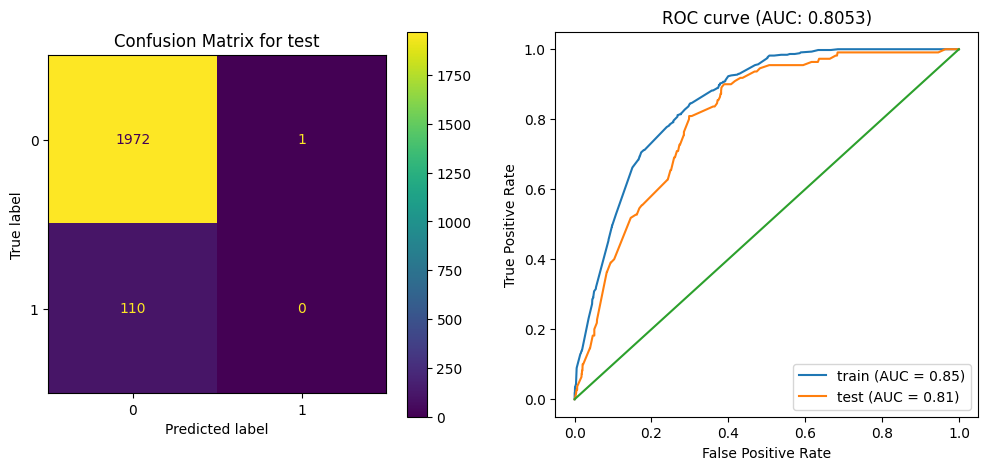

In [57]:
grid2.fit(X_train_std, y_train)
evaluate(grid2)

In [58]:
grid2.best_params_

{'estimator__max_depth': 2, 'learning_rate': 0.9, 'n_estimators': 10}

## Voting Classifier

In [ ]:
#vote = VotingClassifier(
    #[('DT', DecisionTreeClassifier()),
     #('ada', AdaBoostClassifier()),
     #('gb', GradientBoostingClassifier())])


In [ ]:
#vote_params = {
    #'DT__max_depth': [2, 4, 6],
    #'ada__n_estimators': [50, 100],
    #'gb__n_estimators': [100, 125]}


In [ ]:
#grid3 = GridSearchCV(vote, param_grid=vote_params, cv=5)

In [ ]:
#grid3.fit(X_train_poly, y_train)
#evaluate(grid3)

## Gradient Boosting Classifier

In [ ]:
#gboost = GradientBoostingClassifier()


In [ ]:
#gboost_params = {
    #'max_depth': [2, 4, 6],
    #'n_estimators': [100, 120]}

In [ ]:
#grid4 = GridSearchCV(gboost, param_grid=gboost_params, cv=5)


In [ ]:
#grid4.fit(X_train_poly, y_train)
#evaluate(grid4)

## Support Vector Machines 

In [ ]:
#svc = SVC()


In [ ]:
#pgrid = {"C": np.linspace(0.0001, 1, 20), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
#grid5 = GridSearchCV(svc, param_grid=pgrid, cv=5, verbose=1)


In [ ]:
#grid5.fit(X_train_poly, y_train)
#evaluate(grid5)

## Submission

In [ ]:
test.head()

In [59]:
test['Date'] = pd.to_datetime(test['Date'])
test.set_index('Date',inplace=True)


In [60]:
test = test.join(weather, how='left')

In [61]:
test.columns = test.columns.str.lower()

In [ ]:
test.head()

In [ ]:
test.columns

In [62]:
test['year'] = pd.DatetimeIndex(test['date']).year
test['month'] = pd.DatetimeIndex(test['date']).month
test['day_of_Week'] = pd.DatetimeIndex(test['date']).dayofweek
test['week_number'] = test['date'].dt.isocalendar().week

In [63]:
test['lat_int'] = test.latitude.astype(int)
test['long_int'] = test.longitude.astype(int)

In [64]:
test.replace('M',np.NaN,inplace=True)
test.replace('-', np.NaN, inplace=True)
test.replace('  T', 1, inplace=True)

In [ ]:
test.columns

In [65]:
test['sunrise_num'] = test['sunrise'].apply(extract_second_position)
test['sunset_num'] = test['sunset'].apply(extract_second_position)

In [66]:
columns_to_convert = ['sunrise_num', 'sunset_num', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']  # Specify columns to convert


In [67]:
test[columns_to_convert] = test[columns_to_convert].astype(float)

In [68]:
weather_list = test.codesum.apply(lambda x: x.strip().split(' ')) 


test['is_rain'] = weather_list.apply(lambda x: 'RA' in x).astype(int)
test['is_mist'] = weather_list.apply(lambda x: 'BR' in x).astype(int)
test['is_haze'] = weather_list.apply(lambda x: 'HZ' in x).astype(int)

In [69]:
columns_num = ['lat_int', 'long_int', 'wetbulb', 'dewpoint','year', 'week_number', 'month', 'day_of_Week', 'tmax', 'tmin', 'tavg', 'sunrise_num', 'sunset_num', 'is_rain', 'is_mist', 'is_haze', 'heat', 'cool', 'preciptotal']
columns_categorical = ['species', 'address'] 



In [70]:
X_test = pd.concat([
    test[columns_num],
    pd.get_dummies(test[columns_categorical], drop_first=True, dtype=int)], axis=1)


In [71]:
for col in X_train.columns : # iterate all columns in train data
    if col not in X_test.columns: # if the column is not in test data
        X_test[col] = 0 # make the column filled with 0 values
X_test = X_test[X_train.columns] # drop "columns exist only in test data" and sort in the same order

print(X_test.shape)

(116293, 162)


In [ ]:
X_test.columns

In [ ]:
for idx, col in enumerate(X_test.columns):
    print(f"Column {idx}: {col}")


In [ ]:
for idx, col in enumerate(X_train.columns):
    print(f"Column {idx}: {col}")


In [ ]:
# Find columns in X_test.columns but not in X_train.columns
columns_only_in_test = set(X_test.columns) - set(X_train.columns)

# Display the columns that appear in X_test.columns but not in X_train.columns
for idx, col in enumerate(columns_only_in_test):
    print(f"Column {idx}: {col}")

In [ ]:
columns_only_in_test

In [ ]:
X_train.columns

In [72]:
# Transform X_train_knn and X_valid_knn using StandardScaler
X_test_std = sc.transform(X_test)


In [73]:
prediction = grid2.predict_proba(X_test_std)[:,1]
result_df = test.copy()
result_df['WnvPresent'] = prediction

In [74]:
# Save as csv file
test['WnvPresent'] = prediction
test[['id', 'WnvPresent']].to_csv('submission6.csv', index=False)

In [ ]:
test